**Fully cleaning the dataset**

**Importing data**


In [1]:
# imports
from IPython.display import clear_output
from PIL import Image
import os
import json
# clear
clear_output(wait=True)
# installing kaggle
!pip install -q kaggle
# user and key info
info = {"username":"jackbellamy","key":"3442898ba5e904ac3a48eb5b59398805"}
# opening file
json_object = json.dumps(info, indent=4)
with open("kaggle.json", "w") as outfile:
    outfile.write(json_object)
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
# copying data to content file of kaggle which can be found on the left hand side of the screen
if not (os.path.exists("/content/nfl-big-data-bowl-2022")):
  !kaggle competitions download -c nfl-big-data-bowl-2022
  !mkdir nfl-big-data-bowl-2022
  !unzip nfl-big-data-bowl-2022.zip -d nfl-big-data-bowl-2022

100% 783M/783M [00:08<00:00, 82.9MB/s]
100% 783M/783M [00:08<00:00, 99.8MB/s]
Archive:  nfl-big-data-bowl-2022.zip
  inflating: nfl-big-data-bowl-2022/PFFScoutingData.csv  
  inflating: nfl-big-data-bowl-2022/games.csv  
  inflating: nfl-big-data-bowl-2022/players.csv  
  inflating: nfl-big-data-bowl-2022/plays.csv  
  inflating: nfl-big-data-bowl-2022/tracking2018.csv  
  inflating: nfl-big-data-bowl-2022/tracking2019.csv  
  inflating: nfl-big-data-bowl-2022/tracking2020.csv  


**Serialisation**

In [2]:
import pandas as pd
# reading the data to variables
scouting = pd.read_csv("/content/nfl-big-data-bowl-2022/PFFScoutingData.csv")
games = pd.read_csv("/content/nfl-big-data-bowl-2022/games.csv")
players = pd.read_csv("/content/nfl-big-data-bowl-2022/players.csv")
plays = pd.read_csv("/content/nfl-big-data-bowl-2022/plays.csv")
tracking2018 = pd.read_csv("/content/nfl-big-data-bowl-2022/tracking2018.csv")
tracking2019 = pd.read_csv("/content/nfl-big-data-bowl-2022/tracking2019.csv")
tracking2020 = pd.read_csv("/content/nfl-big-data-bowl-2022/tracking2020.csv")

**Generalised cleaning functions**

**Abbreviations to full names**

In [3]:
def abbrvs(csv,column,abbrv,fullname):
  # new names
  type_name = []
  # looping through
  for i in csv[column]:
    # filtering out NaN values
    if i in abbrv:
      index = abbrv.index(i)
      type_name.append(fullname[index])
    else:
      type_name.append(i)
  return type_name

**Team and number splitting**

In [4]:
def team_number_splitting(csv,column,symbol):
  # splitting to team and number
  split_team = []
  split_numbers = []
  # splitting the data
  split = csv[column].str.split(symbol, expand = True)
  # loop for each
  for i in range(0,len(csv)):
    # specific data
    split.iloc[i]
    # number of NaN
    nan_num = split.iloc[i].isna().sum()
    max = len(split.iloc[i])
    if max-nan_num == 0:
      split_team.append(csv[column][i])
      split_numbers.append(csv[column][i])
    else:
      info = []
      for j in range(0,(max-nan_num)):
        split_i = split[j][i].split(" ")
        info.append(split_i)
      # team name
      split_team.append(info[0][0])
      # numbers
      nums = []
      for k in range(0,max-nan_num):
        num = info[k][1]
        nums.append(num)
      split_numbers.append(nums)
  return split_team,split_numbers

**Number splitting**

In [5]:
def number_splitting(csv,column,symbol,n):
  split = csv[column].str.split(symbol, n = n, expand = True)
  return split

**Pandas to number**

In [6]:
def pd_to_num(csv,split,column_names):
  split.columns = column_names
  # adding columns
  for name in column_names:
    csv[name] = pd.to_numeric(split[name])
  return

**Scouting** 


In [7]:
# before
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF


In [ ]:
# abbreviations: 'kickType', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'
# team number splitting: 'missedTackler', 'specialTeamsSafeties', 'Vises'
# number splitting: 'kickoffReturnFormation'

In [8]:
# abbreviations
# 'kickType'
csv = scouting
column = "kickType"
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# calling function
kick_type_fullnames = abbrvs(csv,column,kick_types,kick_type_names)
# adding column
scouting["kick_type_name"] = kick_type_fullnames

# 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectIntended', 'returnDirectionActual', 'KickTypeContact'

In [9]:
# team and numbers
# 'missedTackler'
csv = scouting

column = "missedTackler"
symbol = "; "
# calling function
missed_tackler_team, missed_tackler_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["missed_tackler_team"] = missed_tackler_team
scouting["missed_tackler_numbers"] = missed_tackler_numbers

# 'specialTeamsSafeties'
column = "specialTeamsSafeties"
symbol = "; "
# calling function
specialTeamsSafeties_team, specialTeamsSafeties_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["special_teams_safeties_team"] = specialTeamsSafeties_team
scouting["special_teams_safeties_numbers"] = specialTeamsSafeties_numbers

# 'Vises'
column = "vises"
symbol = "; "
# calling function
vises_team, vises_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["vises_team"] = vises_team
scouting["vises_numbers"] = vises_numbers

In [10]:
# number splitting
# 'kickoffReturnFormation'
csv = scouting
column = "kickoffReturnFormation"
symbol = "-"
n = 2
column_names = ['formation_front','formation_mid','formation_back']
# calling function
formation_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,formation_split,column_names)

In [11]:
# after
scouting.head()

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,...,kick_type_name,missed_tackler_team,missed_tackler_numbers,special_teams_safeties_team,special_teams_safeties_numbers,vises_team,vises_numbers,formation_front,formation_mid,formation_back
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,...,Deep,NaN,NaN,PHI,"[23, 27]",NaN,NaN,8.0,0.0,2.0
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,...,Normal,PHI,[57],NaN,NaN,ATL,"[83, 27, 34, 21]",NaN,NaN,NaN
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,PHI,[58],NaN,NaN,NaN,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,...,Deep,ATL,[83],ATL,"[17, 22]",NaN,NaN,8.0,0.0,2.0
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,...,Normal,NaN,NaN,ATL,[37],ATL,"[83, 34, 21]",NaN,NaN,NaN


**Games**

In [12]:
# before
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN


In [ ]:
# abbreviations: 'homeTeamAbbr' , 'visitorTeamAbbr'
# team number splitting:
# number splitting: 'gameDate', 'gameTimeEastern'

In [ ]:
# abbreviations
# 'homeTeamAbbr', 'visitorTeamAbbr'

In [13]:
# number splitting
# 'gameDate'
csv = games

column = "gameDate"
symbol = "/"
n = 2
column_names = ['game_date_day','game_date_month','game_date_year']
# calling function
game_date_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_date_split,column_names)

# 'gameTimeEastern'
column = "gameTimeEastern"
symbol = ":"
n = 2
column_names = ['game_time_hour','game_time_minute','game_time_second']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [14]:
# after
games.head()

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,game_date_day,game_date_month,game_date_year,game_time_hour,game_time_minute,game_time_second
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL,9,6,2018,20,20,0
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF,9,9,2018,13,0,0
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT,9,9,2018,13,0,0
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN,9,9,2018,13,0,0
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN,9,9,2018,13,0,0


**Players**

In [15]:
# before
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [ ]:
# abbreviations:
# team number splitting:
# number splitting: birth
# unique one is height

In [16]:
# 'birthDate'
# splitting the numbers
players['birth_year'] = pd.DatetimeIndex(players['birthDate']).year

In [17]:
# 'height'
height_split = players["height"].str.split("-", n = 1, expand = True)
# new column names
height_split.columns = ['Feet', 'Inch']
# adding new columns
players["height_feet"] = pd.to_numeric(height_split["Feet"])
players["height_inch"] = pd.to_numeric(height_split["Inch"])
# still have 73 feet
# getting rid of NaN values
players["height_inch"] = players["height_inch"].fillna(0)
# replacing heights that did not have '-' at start
for i in players["height_feet"]:
    if i > 7:
        j = 0.0833333 * i
        players["height_feet"].replace({i : j}, inplace=True)        
# inches to numerical value
players["height_inch"] = 0.0833333 * players["height_inch"]
# adding feet and inches to get one value
height_numerical = players["height_feet"] + players["height_inch"]
# adding new numerical value column
players["height_numerical"] = pd.to_numeric(height_numerical)

In [18]:
# after
players.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName,birth_year,height_feet,height_inch,height_numerical
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,1992.0,6.0,0.083333,6.083333
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,1994.0,6.0,0.000000,6.000000
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,1993.0,6.0,0.000000,6.000000
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,1992.0,6.0,0.083333,6.083333
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,1993.0,6.0,0.083333,6.083333


**Plays**

In [19]:
# before
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [ ]:
# abbreviations: 'possessionTeam'
# team number splitting: 'penaltyJerseyNumbers'
# number splitting: 'gameClock'

In [ ]:
# abbreviations
# 'possessionTeam'

In [20]:
# team number splitting
# 'penaltyJerseyNumbers'
csv = plays

column = "penaltyJerseyNumbers"
symbol = ";"
# calling function
penaltyJerseyNumbers_team, penaltyJerseyNumbers_numbers = team_number_splitting(csv,column,symbol)
# adding
scouting["penalty_jersey_team"] = penaltyJerseyNumbers_team
scouting["penalty_jersey_numbers"] = penaltyJerseyNumbers_numbers

# broken, think it is to do with values being just team name 'BAL'

IndexError: ignored

In [21]:
# number splitting
# 'gameClock'
csv = plays

column = "gameClock"
symbol = ":"
n = 2
column_names = ['game_clock_minute','game_clock_second','game_clock_milli']
# calling function
game_time_split = number_splitting(csv,column,symbol,n)
# calling function
pd_to_num(csv,game_time_split,column_names)

In [22]:
# after
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,game_clock_minute,game_clock_second,game_clock_milli
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,...,0,0,NaN,66.0,NaN,40,45,15,0,0
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,...,0,0,NaN,56.0,5.0,36,18,9,20,0
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,...,0,0,NaN,21.0,NaN,0,13,5,3,0
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,...,0,3,NaN,64.0,30.0,34,75,5,1,0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,...,0,3,NaN,65.0,NaN,45,45,0,33,0


**Tracking**

In [23]:
# before
tracking2018.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right


In [ ]:
# it is clean

**Overall, clean now except 'penaltyJerseyNumbers' and some abbrvs**

**Data exploration**

Specific data

In [24]:
# x and y positions of players
x = tracking2018['x']
y = tracking2018['y']

# getting specific play and player, x and y
nfl_id = 39470
display_name = "Justin Tucker"

x_nfl_id_name = tracking2018.loc[((tracking2018["nflId"] == nfl_id) & (tracking2018["displayName"] == display_name)), "x"]
y_nfl_id_name = tracking2018.loc[((tracking2018["nflId"] == nfl_id) & (tracking2018["displayName"] == display_name)), "y"]

x_nfl_id_name.head()

0    41.32
1    41.68
2    42.05
3    42.43
4    42.84
Name: x, dtype: float64

**Kicks**

In [166]:
import plotly.graph_objects as go
import plotly.express as px
from skimage import io

data = plays.groupby('specialTeamsPlayType').nunique().reset_index()[['specialTeamsPlayType','playId']]

fig = px.bar(data, 
             x='specialTeamsPlayType', 
             y='playId',
             labels={'specialTeamsPlayType':'Type of Special team plays',
                   'playId':'Number of plays'},
             width=600, 
             height=400
            )

fig.show()

**Extra**

In [215]:
data = scouting['kick_type_name'].value_counts()

fig = px.bar(data, 
            labels={'x':'Kick type',
                   'y':'Number of kicks'},
            width=600, 
            height=400
            )

fig.update_layout(showlegend=False)

fig.show()

**Different kick types and hangtimes**

In [218]:
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np
# abbrvs
kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']
kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']
# loop
data = []
group_labels = []
for kick_type in kick_types:
  # finding full name
  index = kick_types.index(kick_type)
  # getting data
  kick_data = scouting.loc[(scouting["kickType"] == kick_type), "hangTime"]
  # zero-ing
  kick_data = kick_data.dropna(axis='rows',how='any')
  kick_data = kick_data.values.tolist()
  # adding data
  if len(kick_data) > 50:
    data.append(kick_data)
    group_labels.append(kick_type)

# plotting
fig = px.histogram(scouting.dropna(subset=["hangTime","kickType"]),
                  x = "hangTime",
                  color = "kickType", 
                  width=600, 
                  height=400
                  )
fig.show()

fig = px.box(scouting, 
             x="kick_type_name", 
             y="hangTime", 
             width=600, 
             height=400
             )
fig.show()

fig = ff.create_distplot(data,
                         group_labels,
                         show_hist=False
                        )
fig.show()

**Another attempt**

In [ ]:
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import numpy as np

kick_types = ['D','F','K','O','P','Q','S','B','N','R','A']

kick_type_names = ['Deep','Flat','Free','Obvious','Pooch','Squib','Surprise','Deep','Normal','Rugby','Aussie']

plt.figure(figsize=(10, 6))
# loop
for kick_type in kick_types:
  # finding full name
  index = kick_types.index(kick_type)
  # getting data
  kick_data = scouting.loc[(scouting["kickType"] == kick_type), "hangTime"]
  # plotting
  ax = sns.distplot(kick_data,hist=False,label= kick_type_names[index])
  #title
  ax.set_title('Hang Time Distribution')

plt.legend()
plt.show()

**Kick length vs return length**

In [223]:
fig = px.scatter(plays, 
                 x="kickLength", 
                 y="kickReturnYardage", 
                 color="specialTeamsPlayType",
                 width=600, 
                 height=400
                 )
fig.show()

**kick length vs return length, kickoff**

In [ ]:
# getting data
# Extra Point, Field Goal, Kickoff or Punt 
kick_type = "Kickoff"
kick_length_data = plays.loc[(plays["specialTeamsPlayType"] == kick_type), "kickLength"]
kick_return_data = plays.loc[(plays["specialTeamsPlayType"] == kick_type), "kickReturnYardage"]
# plotting
fig = px.scatter(x = kick_length_data, 
                 y= kick_return_data,
                 trendline="ols",
                 labels=dict(kickLength="Kick length (yards)", kickReturnYardage="Kick return (yards)"),
                 width=600, 
                 height=400
                )
fig.show()

**kick length vs return length, punt**

In [ ]:
# getting data
# Extra Point, Field Goal, Kickoff or Punt 
kick_type = "Punt"
kick_length_data = plays.loc[(plays["specialTeamsPlayType"] == kick_type), "kickLength"]
kick_return_data = plays.loc[(plays["specialTeamsPlayType"] == kick_type), "kickReturnYardage"]
# plotting
fig = px.scatter(x = kick_length_data, 
                 y= kick_return_data,
                 trendline="ols",
                 labels=dict(kickLength="Kick length (yards)", kickReturnYardage="Kick return (yards)"),
                 width=600, 
                 height=400
                )
fig.show()

**Other kicks**

In [ ]:
fig = px.scatter(plays, 
                 x="kickLength", 
                 y="kickReturnYardage", 
                 color="specialTeamsPlayType",
                 width=600, 
                 height=400
                 )
fig.show()

**Simulations**

**Simulation, made simple therefore cannot get done for plagiarism**

In [ ]:
# figure
fig = go.Figure()

# play
play_2020091000_39 = tracking2020.loc[(tracking2020['playId'] == 3509) & (tracking2020['gameId'] == 2020091310)]

# plotting
fig = px.scatter(play_2020091000_39, 
           x="x", 
           y="y", 
           animation_frame="time", 
           animation_group="nflId",
           color="team",
           hover_name="displayName", 
           width=600, 
           height=400           
          )

# updating axes
fig.update_layout(xaxis_range=[0,120],
                  yaxis_range=[0,53.3]
                  )
# showing
fig.show()

**Trying to code radi**

idea behind this is to be able represent inputs such as hang time, kick type, kick length etc (these can calcuated each other) to then form radis of the players coverage b for the predicted hangtime, resulting in areas where the plot will be white representing space on the field.

In [229]:
# figure
fig = go.Figure()

# play
play_2020091000_39 = tracking2020.loc[(tracking2020['playId'] == 3509) & (tracking2020['gameId'] == 2020091310)]

hangTime = 3

# plotting
fig = px.scatter(play_2020091000_39, 
           x="x", 
           y="y", 
           animation_frame="time",
           animation_group="nflId",
           color="team",
           hover_name="displayName",
           size = "s", 
           width=600, 
           height=400           
          )

# updating axes
fig.update_layout(xaxis_range=[0,120],
                  yaxis_range=[0,53.3]
                  )
# showing
fig.show()

**Field drawing function**

In [ ]:
import matplotlib.patches as patches
from matplotlib.patches import Arc
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Change size of the figure
plt.rcParams['figure.figsize'] = [12, 8]
def drawPitch(width, height, color="w"):
    fig = plt.figure()
    ax = plt.axes(xlim=(-10, width + 30), ylim=(-15, height + 5))
    plt.axis('off')

    # Grass around pitch
    rect = patches.Rectangle((-10, -5), width + 40, height + 10, linewidth=1, facecolor='darkgreen', capstyle='round') # facecolor='#3f995b'
    ax.add_patch(rect)

    # Pitch boundaries
    rect = plt.Rectangle((0, 0), width + 20, height, ec=color, fc="None", lw=2)
    ax.add_patch(rect)

    # vertical lines - every 5 yards
    for i in range(21):
        plt.plot([10 + 5 * i, 10 + 5 * i], [0, height], c="w", lw=2)
        
    # distance markers - every 10 yards
    for yards in range(10, width, 10):
        yards_text = yards if yards <= width / 2 else width - yards
        # top markers
        plt.text(10 + yards - 2, height - 7.5, yards_text, size=15, c="w", weight="bold")
        # botoom markers
        plt.text(10 + yards - 2, 7.5, yards_text, size=15, c="w", weight="bold", rotation=180)

    # yards markers - every yard
    # bottom markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [1, 3], color="w", lw=2)

    # top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - 1, height - 3], color="w", lw=2)

    # middle bottom markers
    y = (height - 18.5) / 2
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [y, y + 2], color="w", lw=2)

    # middle top markers
    for x in range(20):
        for j in range(1, 5):
            plt.plot([10 + x * 5 + j, 10 + x * 5 + j], [height - y, height - y - 2], color="w", lw=2)

    # draw home end zone
    plt.text(2.5, (height - 15) / 2, "HOME", size=30, c="w", weight="bold", rotation=90)
    rect = plt.Rectangle((0, 0), 10, height, ec=color, fc="#0064dc", lw=2)
    ax.add_patch(rect)

    # draw away end zone    
    plt.text(111, (height - 15) / 2, "AWAY", size=30, c="w", weight="bold", rotation=-90)
    rect = plt.Rectangle((width + 10, 0), 10, height, ec=color, fc="#c80014", lw=2)
    ax.add_patch(rect)
    
    # draw extra spot point
    # left
    y = (height - 3) / 2
    plt.plot([10 + 2, 10 + 2], [y, y + 3], c="w", lw=2)
    
    # right
    plt.plot([width + 10 - 2, width + 10 - 2], [y, y + 3], c="w", lw=2)
    
    # draw goalpost
    goal_width = 6 # yards
    y = (height - goal_width) / 2
    # left
    plt.plot([0, 0], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    # right
    plt.plot([width + 20, width + 20], [y, y + goal_width], "-", c="y", lw=10, ms=20)
    
    return fig, ax
# plotting
#fig, ax = drawPitch(100, 53.3)

**One play function**

In [ ]:
def extract_one_game(game_id, play_id, df):
    game = df[(df.gameId == game_id) & (df.playId == play_id)]
    home = {}
    away = {}
    balls = []
    
    players = game.sort_values(['frameId'], ascending=True).groupby('nflId')
    for id, dx in players:
        jerseyNumber = int(dx.jerseyNumber.iloc[0])
        if dx.team.iloc[0] == "home":
            home[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))
        elif dx.team.iloc[0] == "away":
            away[jerseyNumber] = list(zip(dx.x.tolist(), dx.y.tolist()))


    ball_df = game.sort_values(['frameId'], ascending=True) 
    ball_df = ball_df[ball_df.team == "football"]
    balls = list(zip(ball_df.x.tolist(), ball_df.y.tolist()))
    return home, away, balls

**Animation function**

In [ ]:
from matplotlib import animation
from IPython.display import HTML
def animate_one_play(game_id, play_id, df):
    fig, ax = drawPitch(100, 53.3)
    
    home, away, balls = extract_one_game(game_id, play_id, df)

    team_left, = ax.plot([], [], 'o', markersize=20, markerfacecolor="r", markeredgewidth=2, markeredgecolor="white", zorder=7)
    team_right, = ax.plot([], [], 'o', markersize=20, markerfacecolor="b", markeredgewidth=2, markeredgecolor="white", zorder=7)
    ball, = ax.plot([], [], 'o', markersize=10, markerfacecolor="black", markeredgewidth=2, markeredgecolor="white", zorder=7)
    drawings = [team_left, team_right, ball]

    def init():
        team_left.set_data([], [])
        team_right.set_data([], [])
        ball.set_data([], [])
        return drawings

    def draw_teams(i):
        X = []
        Y = []
        for k, v in home.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_left.set_data(X, Y)
        
        X = []
        Y = []
        for k, v in away.items():
            x, y = v[i]
            X.append(x)
            Y.append(y)
        team_right.set_data(X, Y)

    def animate(i):
        draw_teams(i)
        
        x, y = balls[i]
        ball.set_data([x, y])
        return drawings
    
    # !May take a while!
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=len(balls), interval=100, blit=True)

    return HTML(anim.to_html5_video())

**Animating**

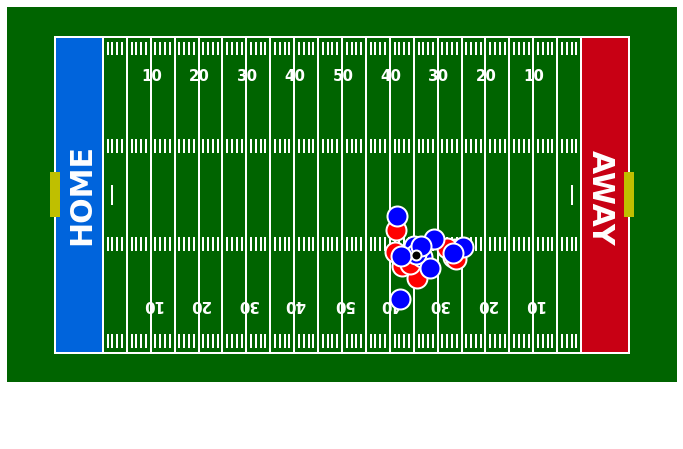

In [ ]:
# game_id, play_id, df
animate_one_play(2018123000, 36, tracking2018)